In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Analysis

In [3]:
train_X = pd.read_csv("train_X.csv")
train_y = pd.read_csv("train_y.csv")
test_X = pd.read_csv("test_X.csv")

## Check the data shape
print(f"Shape of train_X = {train_X.shape}")
print(f"Shape of test_X = {test_X.shape}")
print(f"Shape of train_y = {train_y.shape}")
# print(f"Columns of train = {train_df.columns}")
# print(f"Columns of label = {label_df.columns}")
print("-----------------------------------------------------------------")

## Check the target features
print(train_y.value_counts())
print("-----------------------------------------------------------------")

## Check the features
num_features = train_X.select_dtypes(include=['float64', 'int64']).columns
cat_features = train_X.select_dtypes(include=['object']).columns
print(f"num_featrues:{len(num_features)}\n{num_features}")
print("-----------------------------------------------------------------")
print(f"cat_features:{len(cat_features)}\n{cat_features}")

Shape of train_X = (44939, 83)
Shape of test_X = (19260, 83)
Shape of train_y = (44939, 1)
-----------------------------------------------------------------
has_died
0           41061
1            3878
Name: count, dtype: int64
-----------------------------------------------------------------
num_featrues:76
Index(['encounter_id', 'patient_id', 'hospital_id', 'age', 'bmi',
       'elective_surgery', 'height', 'icu_id', 'pre_icu_los_days', 'weight',
       'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative',
       'arf_apache', 'gcs_eyes_apache', 'gcs_motor_apache',
       'gcs_unable_apache', 'gcs_verbal_apache', 'heart_rate_apache',
       'intubated_apache', 'map_apache', 'resprate_apache', 'temp_apache',
       'ventilated_apache', 'd1_diasbp_max', 'd1_diasbp_min',
       'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min',
       'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min',
       'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_

In [4]:
train_X[num_features].describe()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,weight,...,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
count,44939.000000,44939.000000,44939.000000,42874.000000,43288.000000,44939.000000,44308.000000,44939.000000,44939.000000,43632.000000,...,41048.000000,41048.000000,44593.000000,44593.000000,44593.000000,44593.000000,44593.000000,44593.000000,44593.000000,44593.000000
mean,65642.668751,65491.091346,105.732460,62.318701,29.195878,0.182314,169.565517,509.502659,0.836469,84.002241,...,0.085992,0.043790,0.000718,0.015541,0.223959,0.013208,0.025206,0.007064,0.004193,0.020676
std,37736.732171,37696.448956,62.901289,16.804263,8.263748,0.386107,10.788113,228.631369,2.565688,25.016278,...,0.248608,0.217667,0.026779,0.123691,0.416900,0.114167,0.156751,0.083751,0.064622,0.142298
min,1.000000,1.000000,2.000000,16.000000,14.844926,0.000000,137.200000,82.000000,-13.775000,38.600000,...,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33059.000000,32732.000000,47.000000,52.000000,23.638493,0.000000,162.500000,369.000000,0.034722,66.700000,...,0.020000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65732.000000,65467.000000,109.000000,65.000000,27.680158,0.000000,170.000000,504.000000,0.138194,80.300000,...,0.050000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,98239.500000,98089.500000,161.000000,75.000000,32.962064,0.000000,177.800000,683.000000,0.410417,97.100000,...,0.130000,0.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,131049.000000,131049.000000,204.000000,89.000000,67.814990,1.000000,195.590000,927.000000,159.090972,186.000000,...,0.980000,0.970000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
train_X[num_features].head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,weight,...,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,126956,125763,26,75.0,23.147277,0,163.0,550,0.128472,61.5,...,0.15,0.11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,18184,25399,54,42.0,35.071807,1,157.5,479,3.150694,87.0,...,0.01,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,51597,7974,81,39.0,NaN,0,182.9,90,0.006944,NaN,...,0.03,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,40078,79625,161,62.0,42.070672,0,157.0,413,0.084722,103.7,...,0.09,0.06,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,130673,88261,29,82.0,NaN,0,NaN,904,0.121528,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
train_X[cat_features].head()

,ethnicity,gender,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem,apache_2_bodysystem
0,Asian,M,Accident & Emergency,admit,Neuro ICU,Trauma,Trauma
1,Caucasian,F,Operating Room / Recovery,admit,CTICU,Cardiovascular,Undefined diagnoses
2,African American,M,Accident & Emergency,admit,Med-Surg ICU,Neurological,Neurologic
3,Hispanic,F,Accident & Emergency,admit,Med-Surg ICU,Gastrointestinal,Gastrointestinal
4,Caucasian,F,Accident & Emergency,admit,Med-Surg ICU,Trauma,Trauma


# Categorical Features

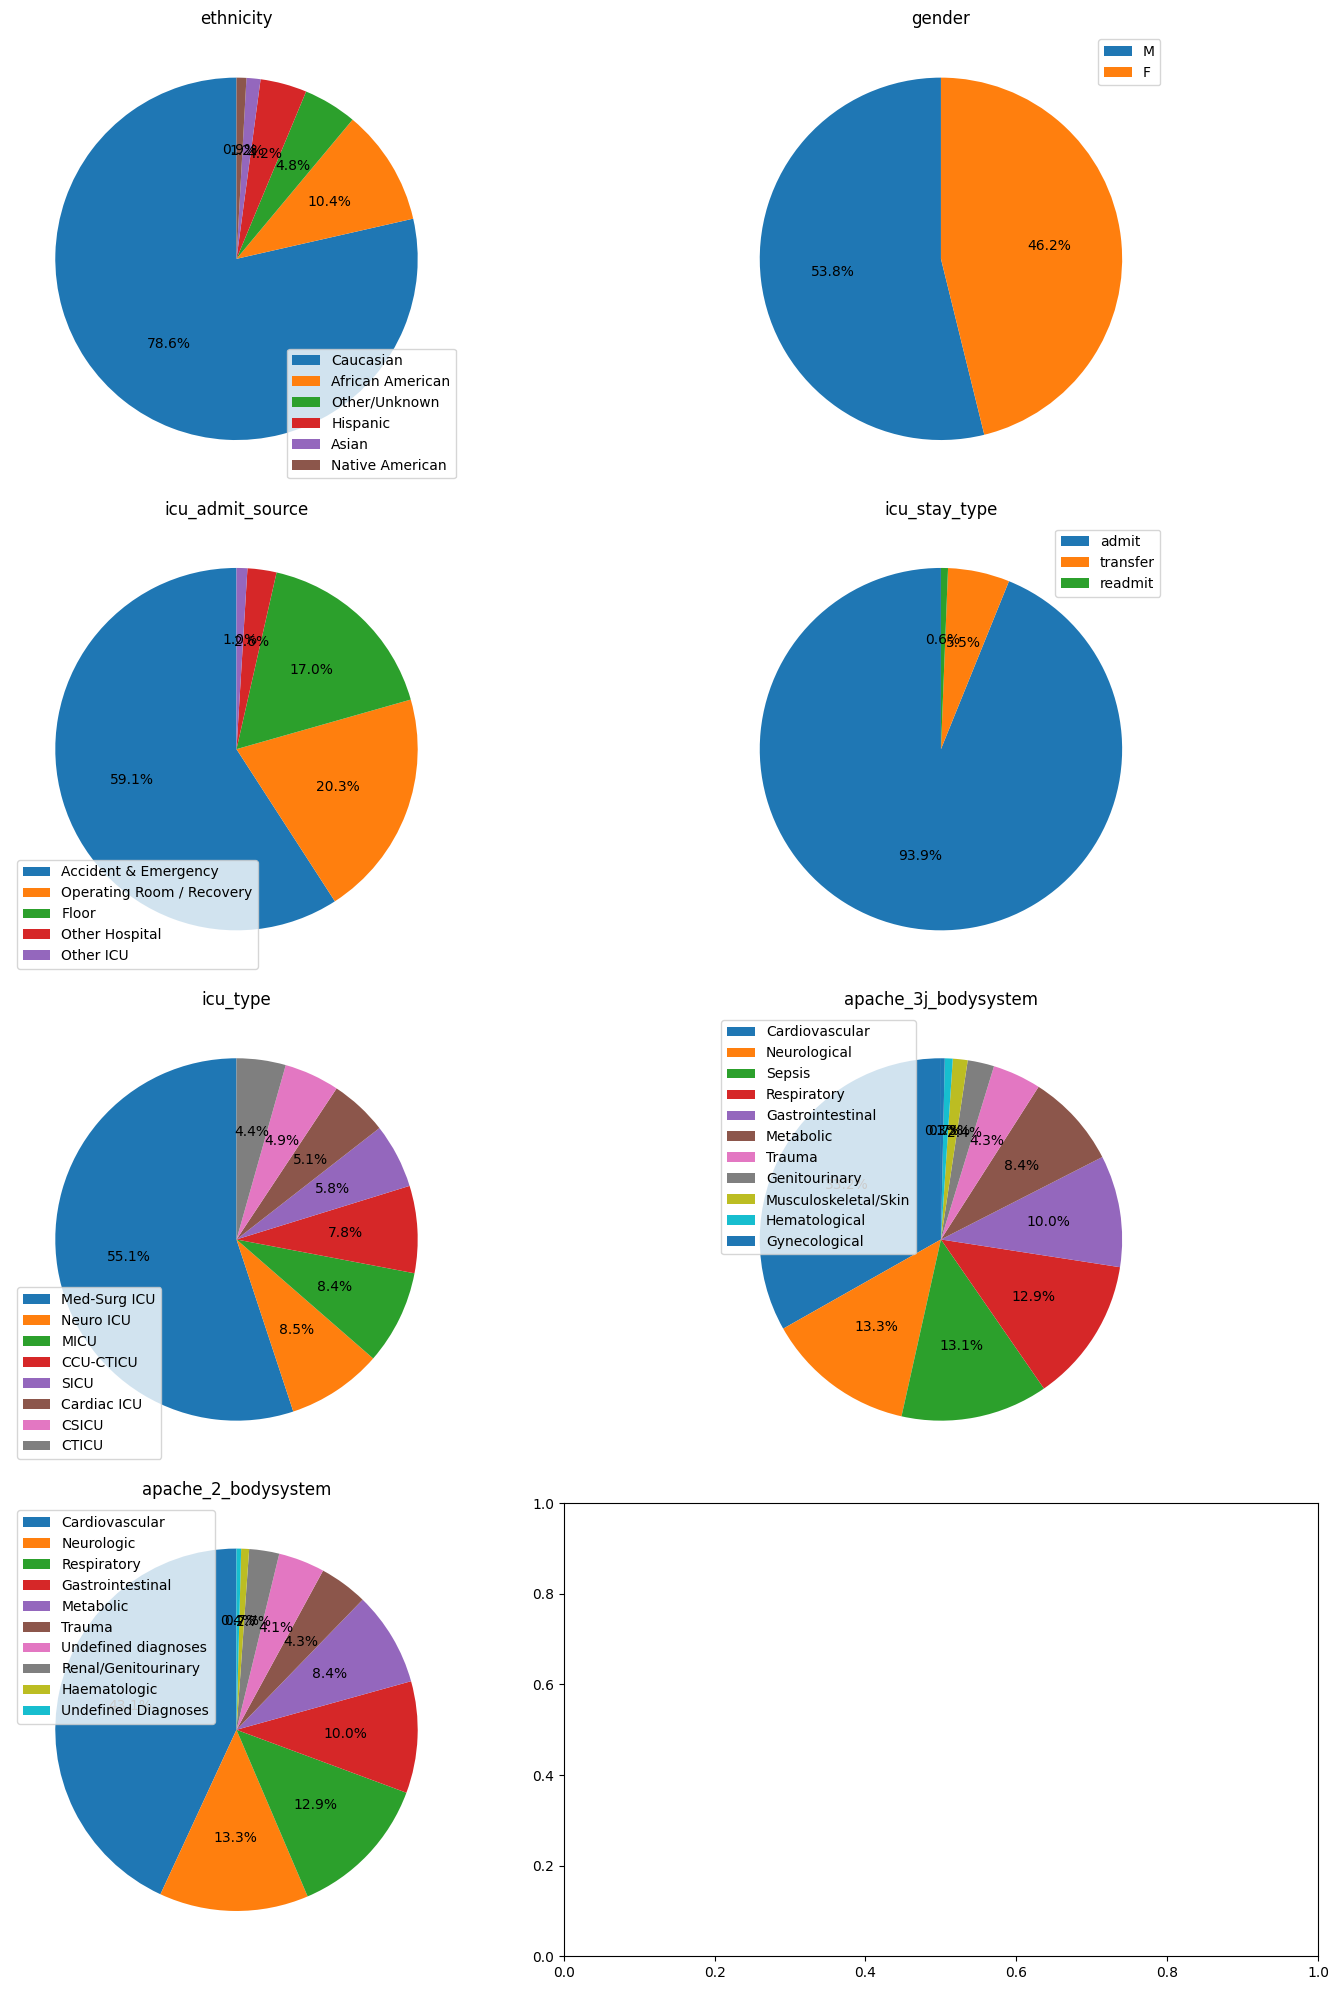

In [6]:
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
for i, feature in enumerate(cat_features):
    row, col = divmod(i, 2) 
    data_counts = train_X[feature].value_counts()  
    axes[row, col].pie(data_counts, labels=None, autopct='%1.1f%%', startangle=90) 
    axes[row, col].set_title(feature)  
    axes[row, col].legend(data_counts.index, loc='best')  
plt.tight_layout()
plt.savefig(f"./visual/pie.png")
plt.show()

# Numerical Feature

In [7]:
def plot_9_num_features(features, idx):
    fig, axes = plt.subplots(3, 3, figsize=(8, 10))
    for i, feature in enumerate(features):
        row, col = divmod(i, 3)  
        axes[row, col].hist(train_X[feature], bins=30, color='skyblue', edgecolor='black')
        axes[row, col].set_title(feature)  
    plt.tight_layout()
    plt.savefig(f"./visual/{idx}.png")
    plt.show()

def plot_4_num_features(features, idx):
    fig, axes = plt.subplots(2, 2, figsize=(6, 6))
    for i, feature in enumerate(features):
        row, col = divmod(i, 2)  
        axes[row, col].hist(train_X[feature], bins=30, color='skyblue', edgecolor='black')
        axes[row, col].set_title(feature)  
    plt.tight_layout()
    plt.savefig(f"./visual/{idx}.png")
    plt.show()


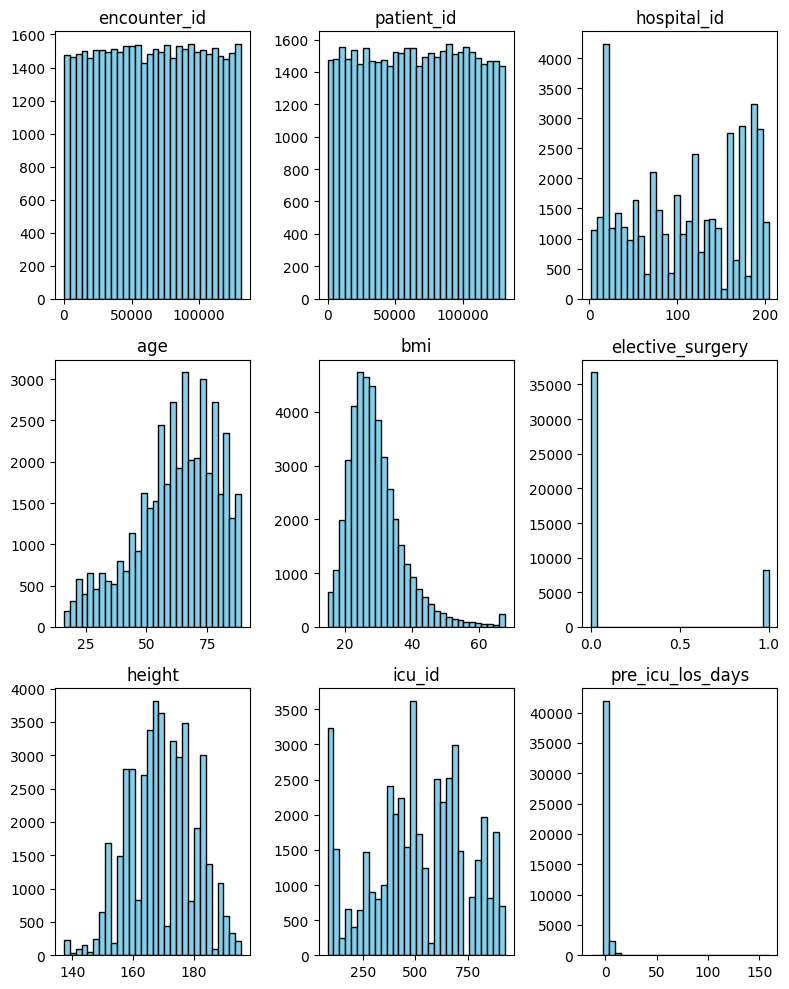

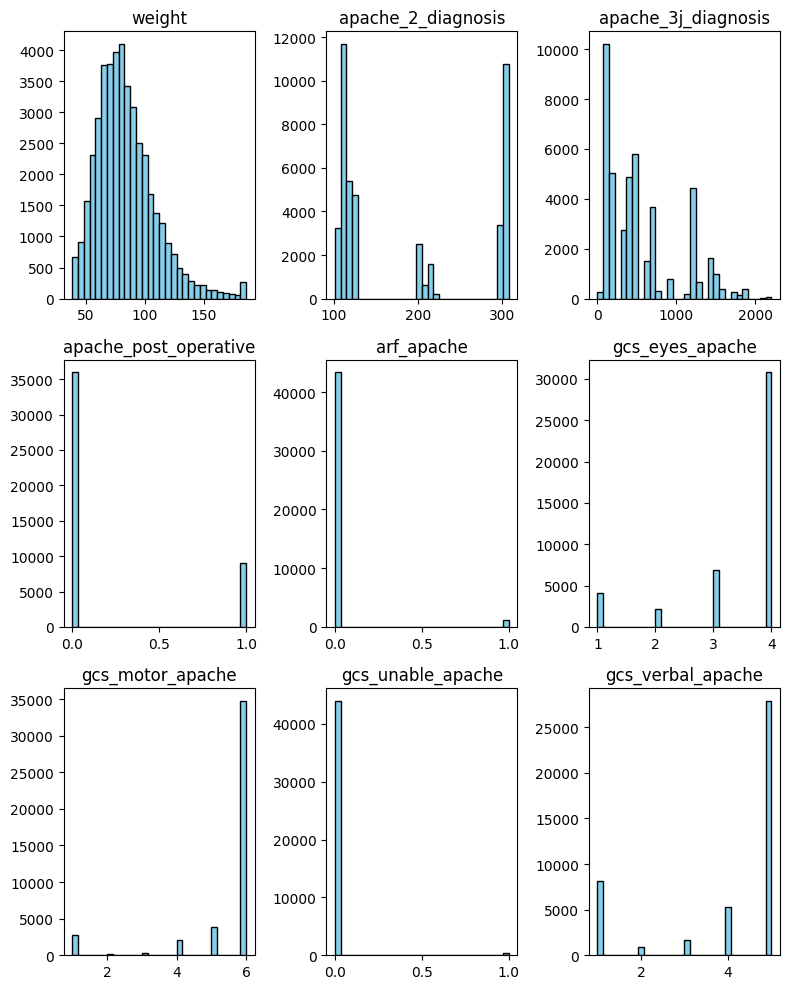

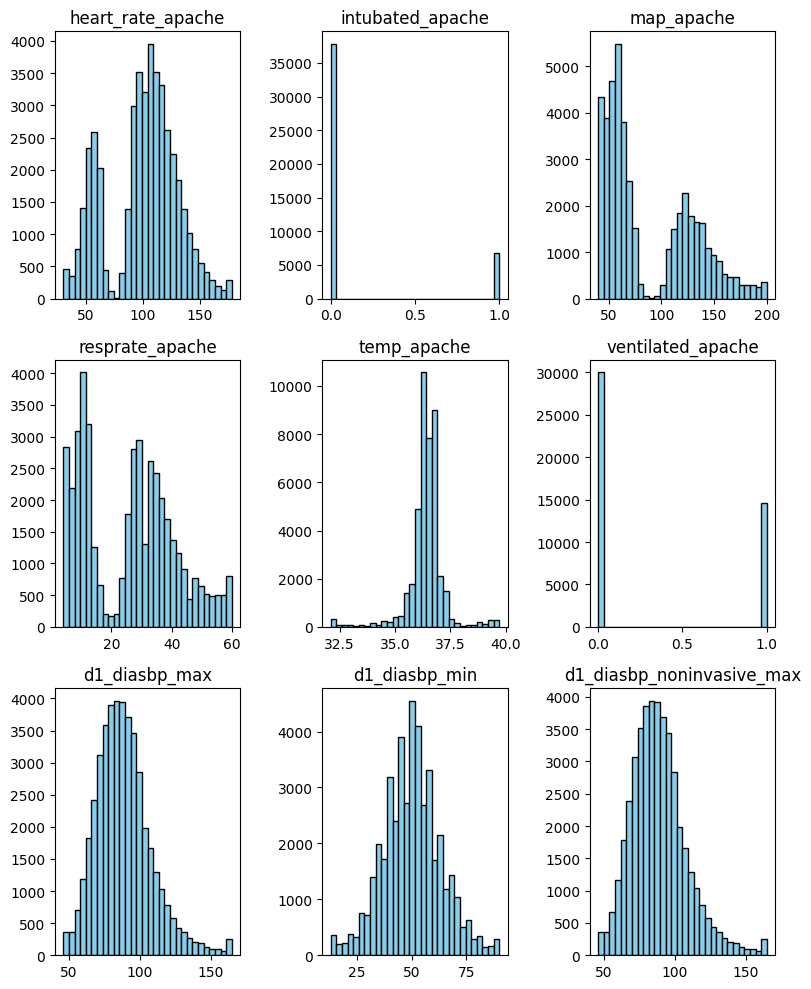

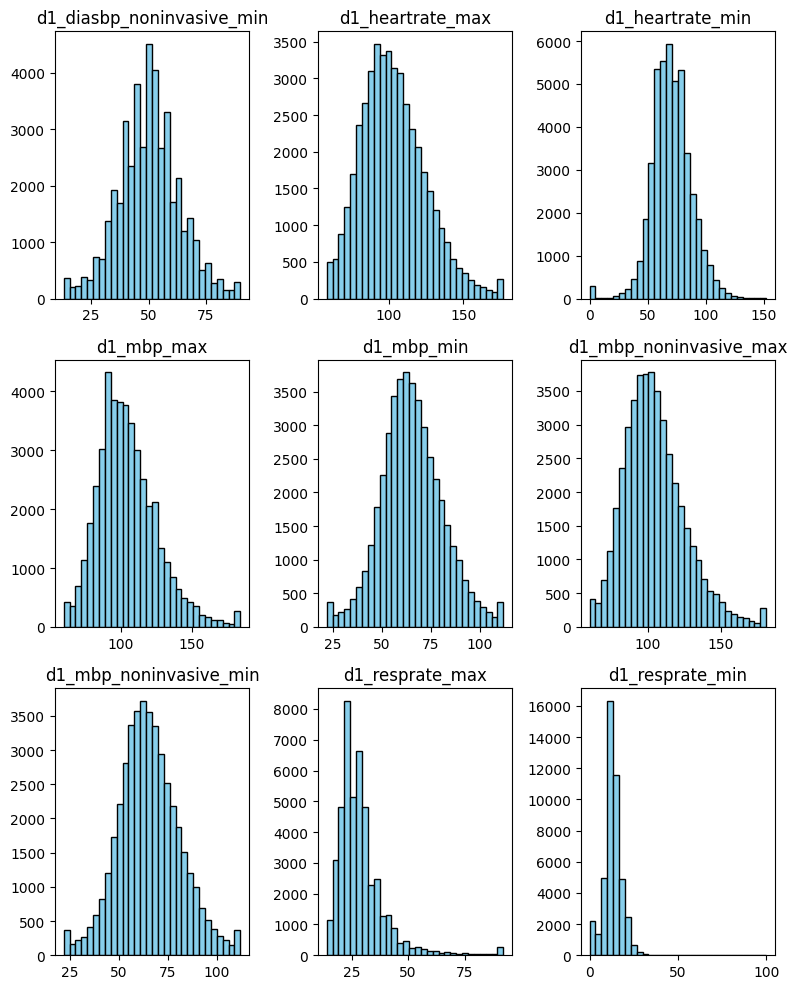

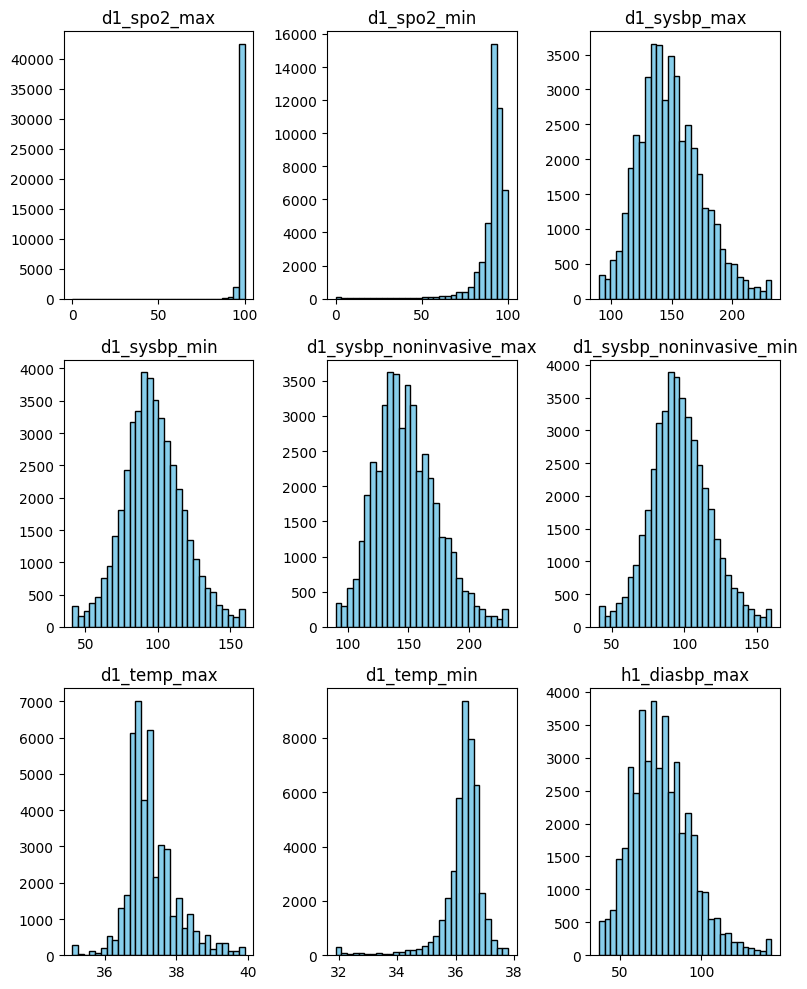

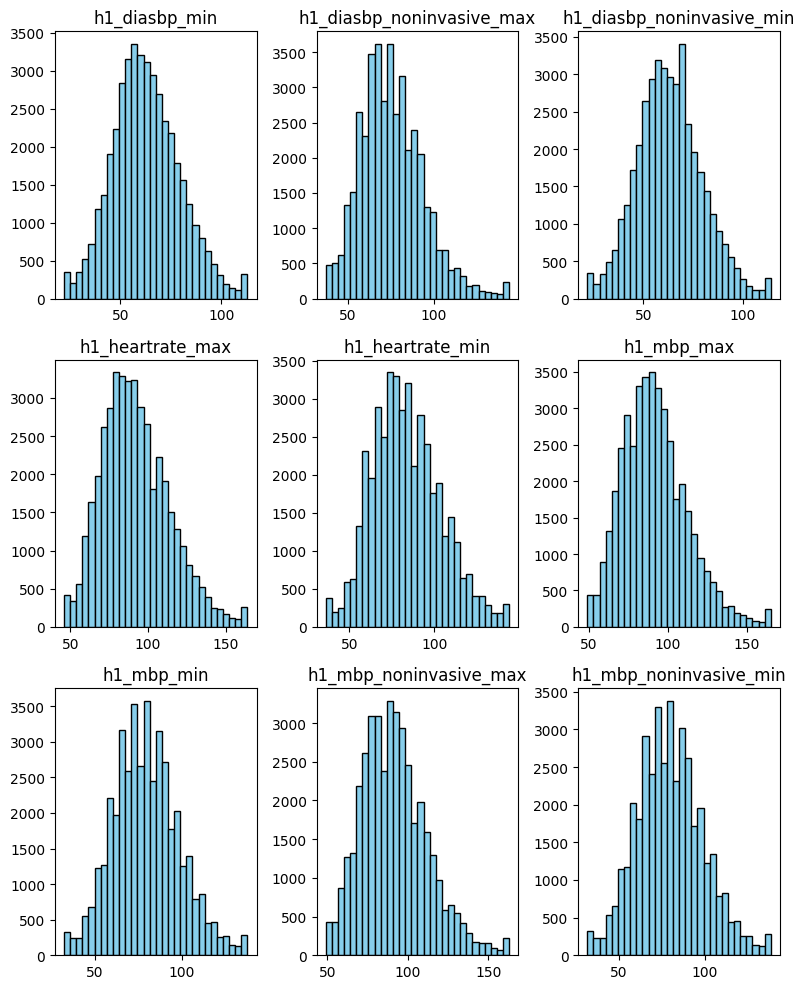

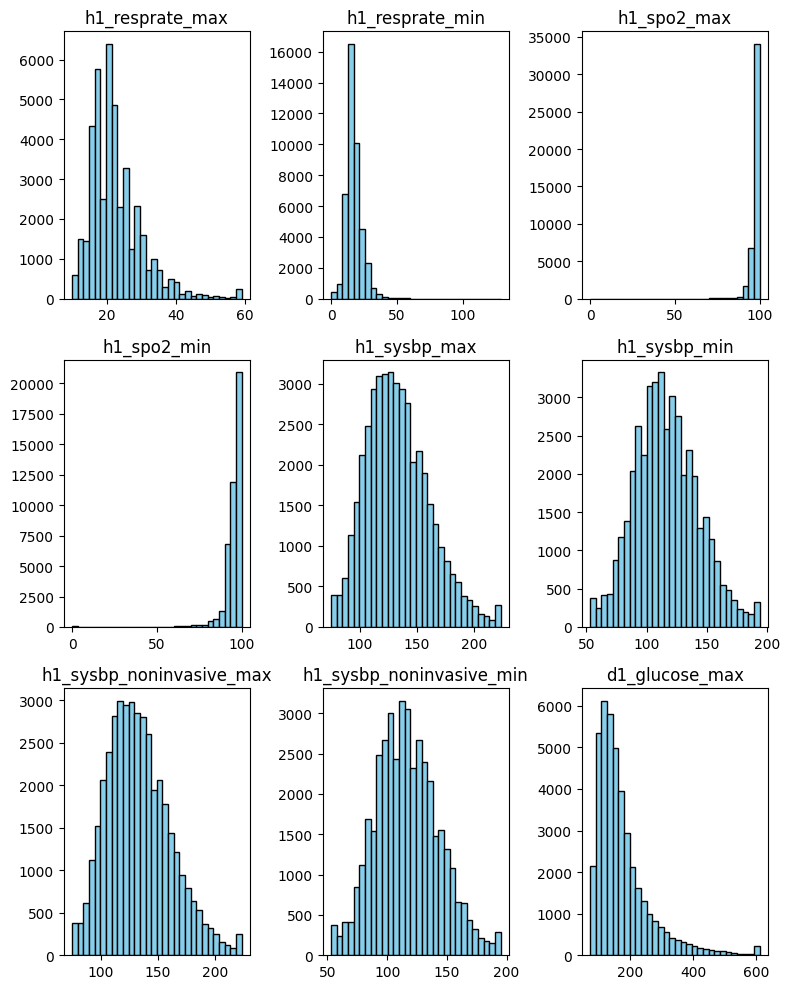

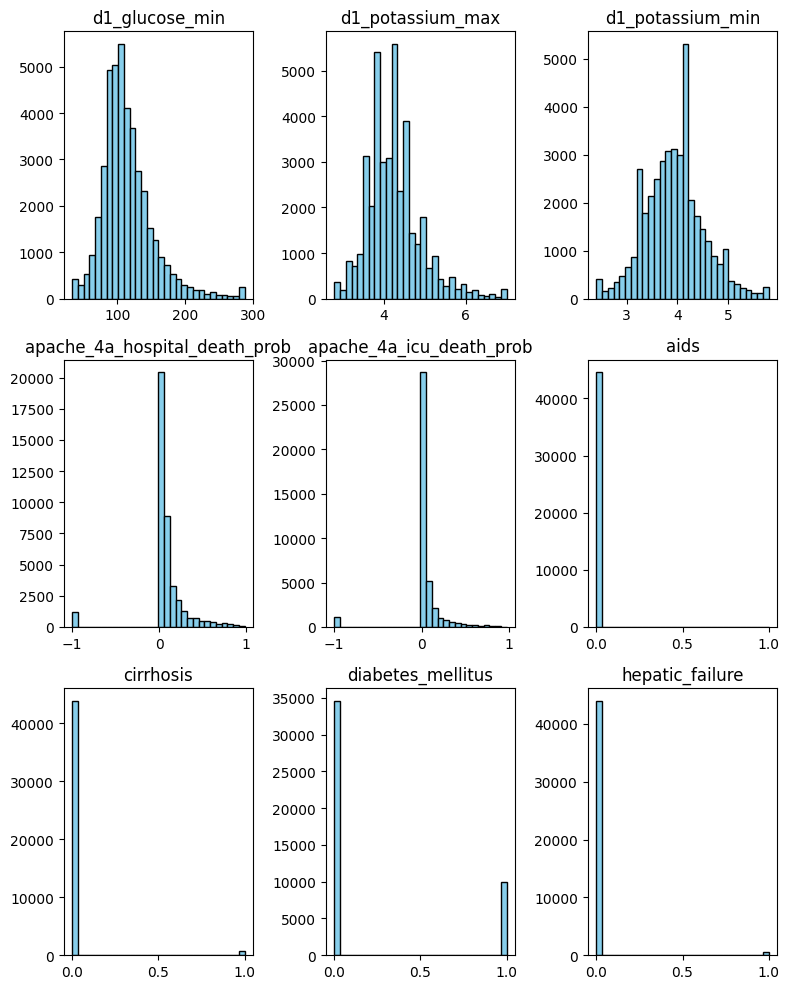

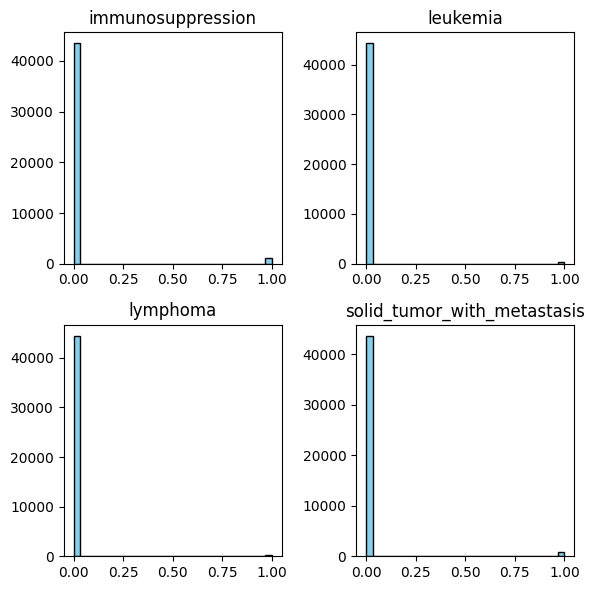

In [8]:
idx = 1
features = ['encounter_id', 'patient_id', 'hospital_id', 
            'age', 'bmi', 'elective_surgery', 
            'height', 'icu_id', 'pre_icu_los_days']
plot_9_num_features(features, idx)

idx = 2
features = ['weight', 'apache_2_diagnosis', 'apache_3j_diagnosis', 
            'apache_post_operative', 'arf_apache', 'gcs_eyes_apache', 
            'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache']
plot_9_num_features(features, idx)

idx = 3
features = ['heart_rate_apache',
       'intubated_apache', 'map_apache', 'resprate_apache', 'temp_apache',
       'ventilated_apache', 'd1_diasbp_max', 'd1_diasbp_min',
       'd1_diasbp_noninvasive_max']
plot_9_num_features(features, idx)

idx = 4
features = ['d1_diasbp_noninvasive_min',       'd1_heartrate_max', 'd1_heartrate_min', 
            'd1_mbp_max', 'd1_mbp_min',       'd1_mbp_noninvasive_max', 
            'd1_mbp_noninvasive_min', 'd1_resprate_max',       'd1_resprate_min']
plot_9_num_features(features, idx)

idx = 5
features = ['d1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max',
       'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min',
       'd1_temp_max', 'd1_temp_min', 'h1_diasbp_max']
plot_9_num_features(features, idx)

idx = 6
features = ['h1_diasbp_min',       'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min',
       'h1_heartrate_max', 'h1_heartrate_min', 'h1_mbp_max', 
       'h1_mbp_min',       'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min']
plot_9_num_features(features, idx)

idx = 7
features = ['h1_resprate_max',       'h1_resprate_min', 'h1_spo2_max', 
            'h1_spo2_min', 'h1_sysbp_max',       'h1_sysbp_min', 
            'h1_sysbp_noninvasive_max', 'h1_sysbp_noninvasive_min',       'd1_glucose_max']
plot_9_num_features(features, idx)

idx = 8
features = ['d1_glucose_min', 'd1_potassium_max',       'd1_potassium_min', 
            'apache_4a_hospital_death_prob',       'apache_4a_icu_death_prob', 'aids', 
            'cirrhosis', 'diabetes_mellitus',       'hepatic_failure']
plot_9_num_features(features, idx)

idx = 9
features = ['immunosuppression', 'leukemia', 
            'lymphoma',       'solid_tumor_with_metastasis']
plot_4_num_features(features, idx)
